In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import streamlit as st
import re

In [173]:
#Load the Data 
data_main = pd.read_excel(r'C:\Users\Lenovo\Desktop\Copper_Set.xlsx')
data = data_main.copy()
#data.head()

In [174]:
data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [175]:
data.shape

(181673, 14)

In [176]:
#descriptive analysis: here country acustomer and reference columns are categorical(discrete data)
#width column has large std, data spread is large
#width and thickness are continuous data.
data.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


###  Data Cleaning and EDA -Exploratory Data Analysis

In [177]:
data.duplicated().sum()

0

In [178]:
data.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [179]:
#dropping rows with missing values(if all the values in a row missing)
data.dropna(how='all',axis=0,inplace=True)

In [180]:
data['id'].nunique()
#id field is not required so we drop id column(all unique values)
data.drop(['id'],axis=1,inplace=True)


In [181]:
#quantity tons feature
data['quantity tons'].nunique()  #160715
data['quantity tons'] = data['quantity tons'].astype('int')
sn.distplot(data['quantity tons'])
neg = data['quantity tons']<0
neg.sum()
#this is the only data point in this colum which is categorical probably a wrong entry so we remove this record
#quantity_tons_e = data[data['quantity tons'] =='e']
#quantity_tons_e
#data.drop(index=[173086],inplace=True)

ValueError: invalid literal for int() with base 10: 'e'

In [ ]:
#only one missing value in item_date column, so drop the row
#data['item_date'].unique()
#data.dropna(subset=['item_date'],inplace=True)

In [ ]:
#customer col - only one missing value so drop the row
data.dropna(subset=['customer'],inplace=True)

In [ ]:
data['customer'] = data['customer'].astype('int')
data['customer']

In [102]:
data.customer.nunique() #1169
data.groupby('customer')['selling_price'].mean() #sum of selling price for each customer


customer
12458          935.000000
30147616      1194.000000
30147620       840.588235
30147722       969.345000
30147800       789.600000
                 ...     
30407931       554.250000
30407962      1454.833333
30408166       711.760000
30408185      1247.833333
2147483647     166.958333
Name: selling_price, Length: 1169, dtype: float64

In [ ]:
#country col - 28 missing values
#fill it with mode
data.country.value_counts() #78 is mode of the coutry col
data['country'] = data['country'].fillna(data['country'].mode()[0])
data['country'] = data['country'].astype('int')
data.country
#data.country.nunique() #17 unique values

In [ ]:
data.groupby('country')['selling_price'].sum().plot() #total selling price for each country
plt.xlabel('country') 
plt.ylabel('selling price')
rcParams['figure.figsize'] =10,10


In [ ]:
# 2 missing values in status column, so we drop the corresponding rows
data.status.value_counts()
data.dropna(subset=['status'],inplace=True)

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] =12,4
sn.countplot(data=data, x= 'status')
# major data points are belongs to status category won

In [107]:
#application column has 24 missing values
#fill it with mode value

data.application.value_counts()
data.application.unique()
data['application'] = data['application'].fillna(data['application'].mode()[0])

In [108]:
#thickness, delivery_date, selling_price columns have only one missing value so we drop the corresponding rows.
data.dropna(subset=['thickness','selling_price'],inplace = True)


In [168]:
data.isnull().sum() 

item_date        1
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    1
selling_price    0
dtype: int64

In [296]:
#data['material_ref'].value_counts()

In [150]:
#data['material_ref'] = data['material_ref'].fillna(data['material_ref'].mode()[0])

In [153]:
#wrong_data = data['material_ref'].str.startswith('000000').value_counts()
#wrong_data

False    158947
True      22726
Name: material_ref, dtype: int64

In [271]:
#converting the values starts with 0000000000(rubbish values) into null(nan) values
# data['material_ref'] = [re.sub('^00000000.*','NONE',str(i)) for i in data['material_ref']]
# data['material_ref'].isnull().sum()

0

In [110]:
#there are 77919 missing values out of 181673 entries and 22726 rubbish values in material_ref column, 
#overall more than 50% data missing
#no information from this feature, we drop the feature
data.drop(['material_ref'],inplace = True, axis = 1)

In [27]:
#product_ref feature is discrete(categorical) feature.
data.product_ref.unique()

array([1670798778, 1668701718,     628377,     640665,     611993,
       1668701376,  164141591, 1671863738, 1332077137,     640405,
       1693867550, 1665572374, 1282007633, 1668701698,     628117,
       1690738206,     628112,     640400, 1671876026,  164336407,
        164337175, 1668701725, 1665572032,     611728, 1721130331,
       1693867563,     611733, 1690738219, 1722207579,  929423819,
       1665584320, 1665584662, 1665584642], dtype=int64)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8872\1482679659.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_product_ref = data.groupby('product_ref')['product_ref','selling_price'].count()


<Axes: xlabel='product_ref'>

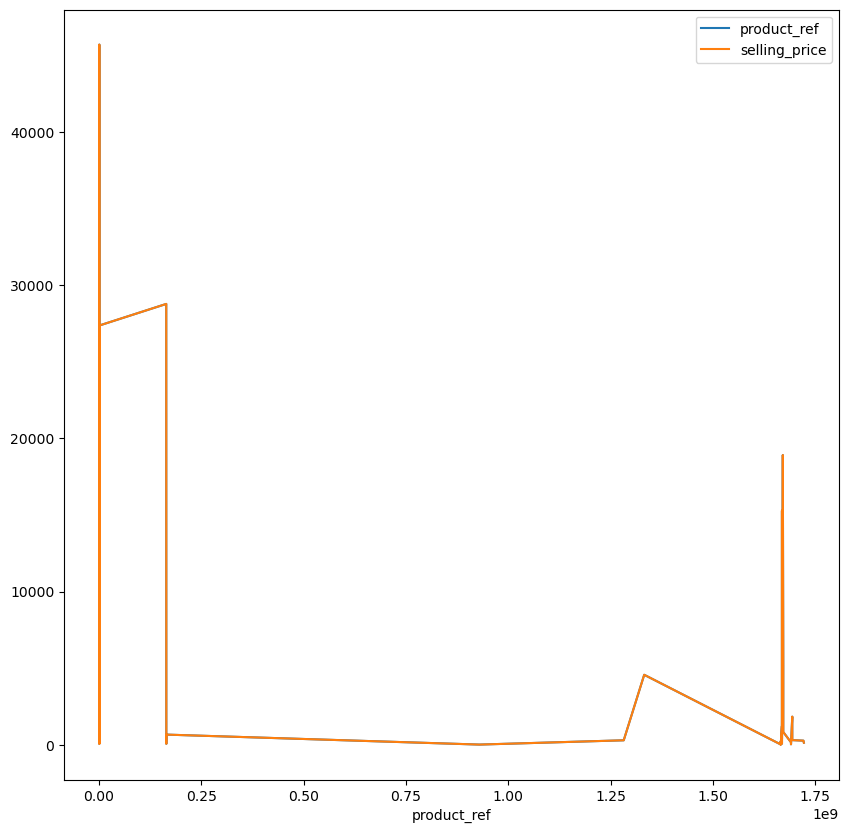

In [28]:
group_product_ref = data.groupby('product_ref')['product_ref','selling_price'].count()
type(group_product_ref)

#plt.scatter(group_product_ref )
group_product_ref.plot()

In [25]:
#we ignore this feature 'item_date', we skipped these steps
#data.item_date.nunique()
#data['item_date'].unique()
#the dates from 02/07/2020 to 01/04/2021, between 2 invalid dates are there(19950000,20191919)

251

In [42]:
# 2 invalid dates are there each has only one record so we remove them
#data[data['item_date'] == '19950000'].index
#data.drop(data.index[52],axis=0,inplace=True)
#data[data['item_date'] == '20191919'].index
#data.drop(data.index[105485],axis=0,inplace=True)
#data.item_date.unique()
#data.iloc[105485]

In [77]:
#date format is wrong. so convert to date format
#import datetime
#data['item_date'] = [str(i) for i in data['item_date']]


In [297]:

#new_dateitems = [pd.to_datetime(i,format="%Y%m%d") for i in data['item_date']]
#new_dateitem = pd.to_datetime('20200820',format='%Y%m%d')
#data['item_date'].unique()
#data['item_date'].astype(datetime64[ns])
#data['item_date_new'] = pd.to_datetime(data['item_date'],format='%Y%m%d')
#data['item_date_new']

In [162]:
#check for datatypes
data.dtypes

item_date        float64
quantity tons     object
customer           int32
country            int32
status            object
item type         object
application        int32
thickness        float64
width            float64
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [112]:
data.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price'],
      dtype='object')

In [30]:
data.thickness.nunique()

594

In [113]:
print(data.application.nunique())
print(data.customer.nunique())
data.application = data.application.astype('int')

30
1169


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8872\3212740887.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[['thickness','width', 'application','quantity tons']])


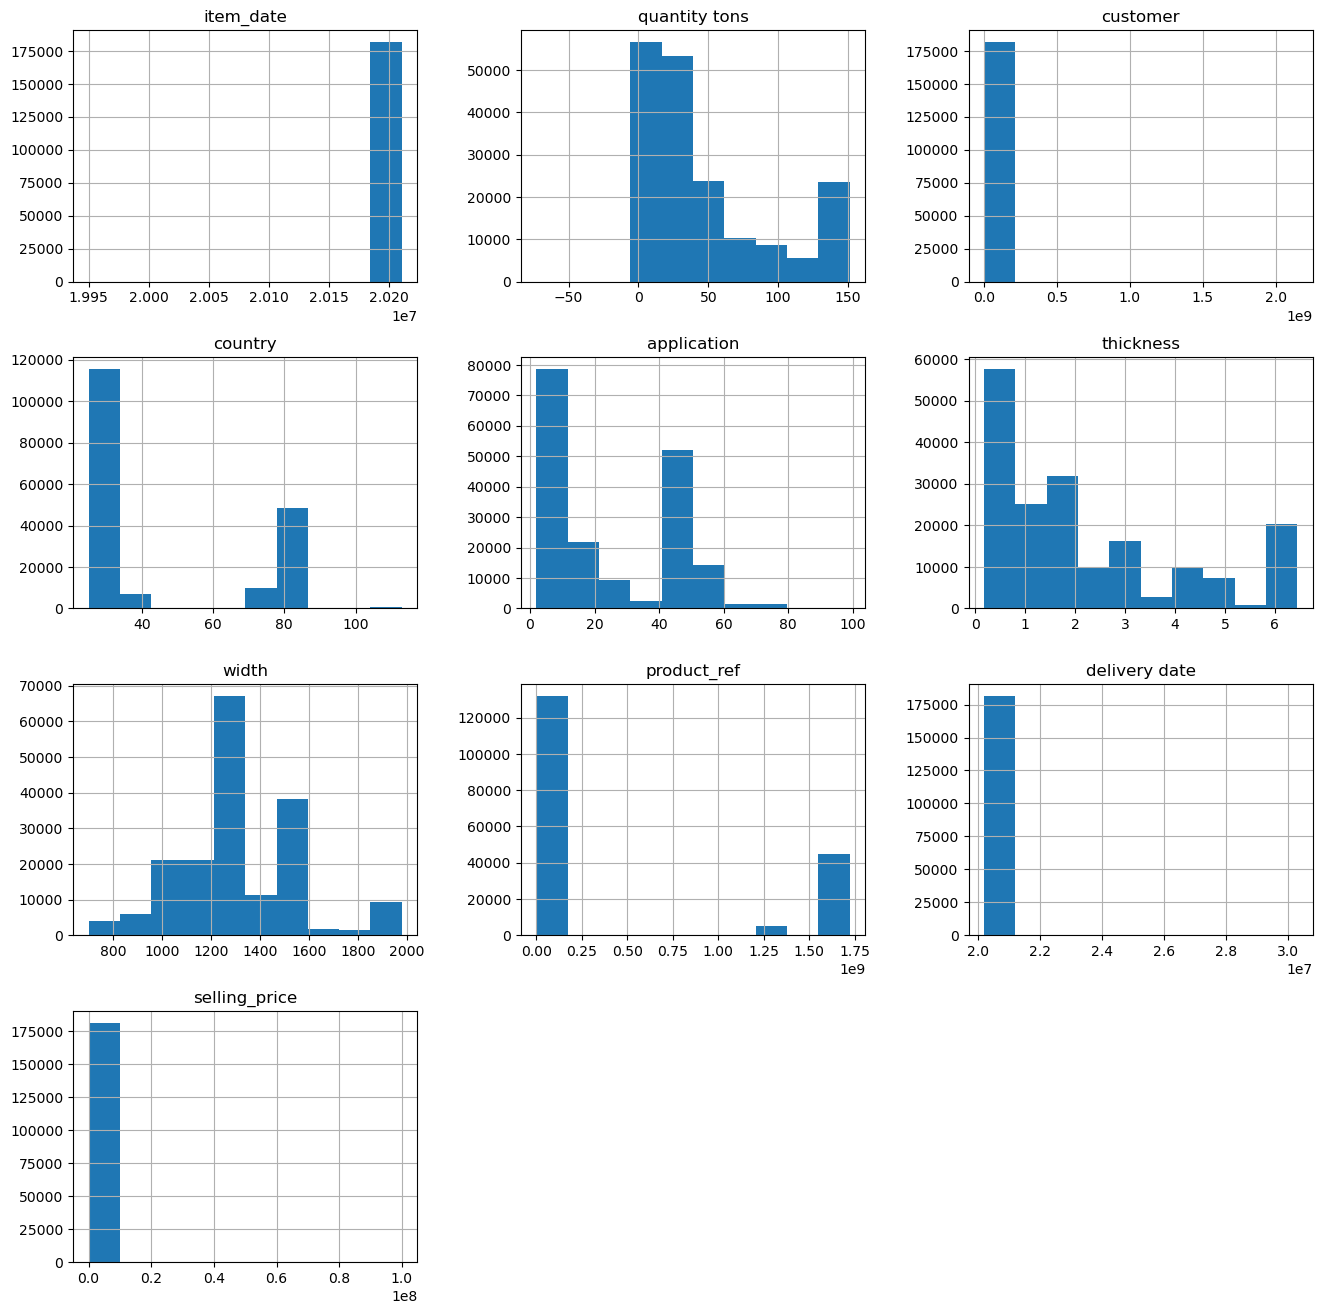

In [165]:
data.hist()
sn.distplot(data[['thickness','width', 'application','quantity tons']])

rcParams['figure.figsize'] =16,16
plt.show()
#from this histogram we see the distributions of features

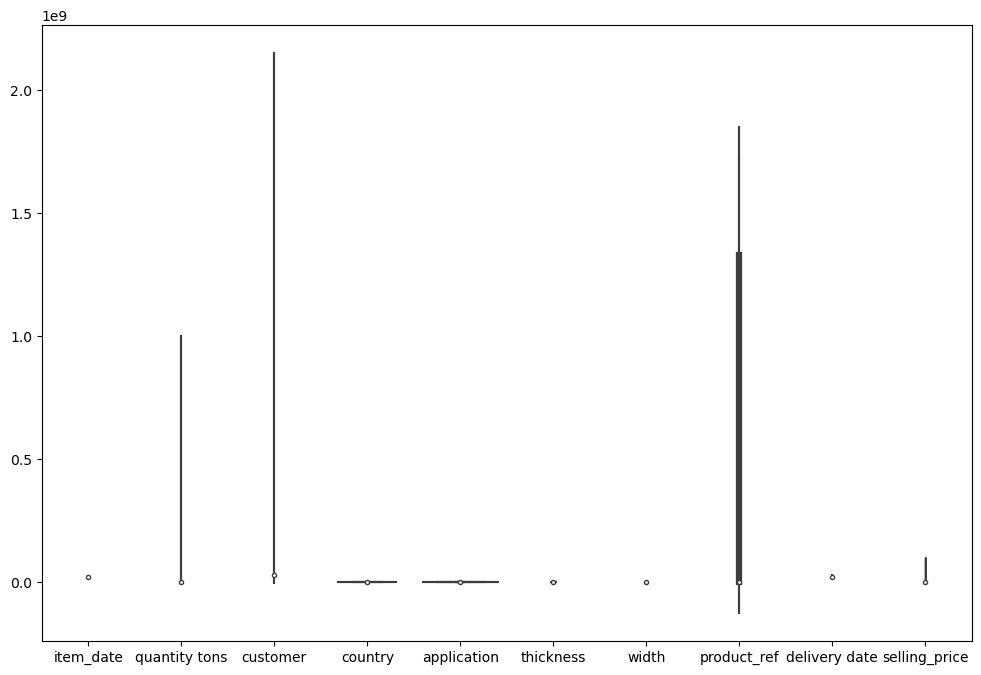

In [123]:
#overall violin plot
sn.violinplot(data)
rcParams['figure.figsize']=12,12

<Axes: >

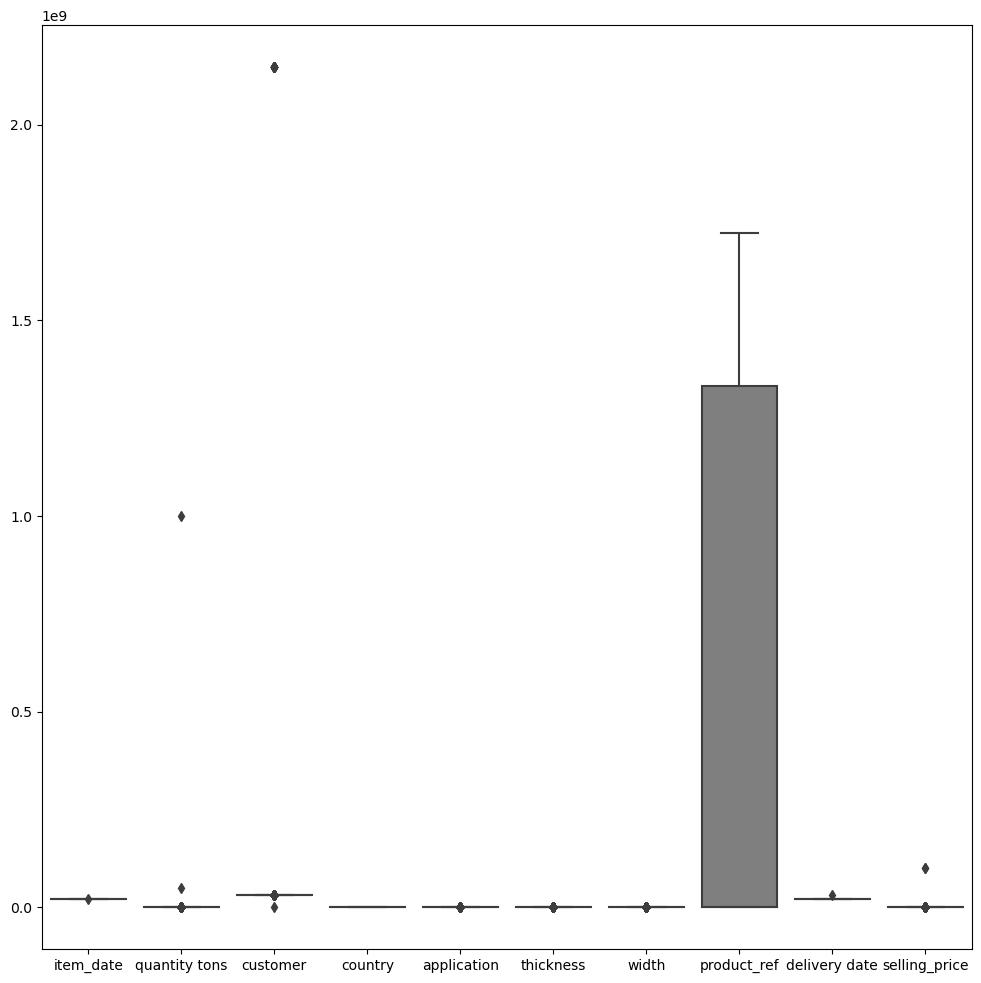

In [124]:
sn.boxplot(data) #overall boxplot

In [215]:
neg_data = data['quantity tons'] < 0 
neg_data.sum()

4

<Axes: >

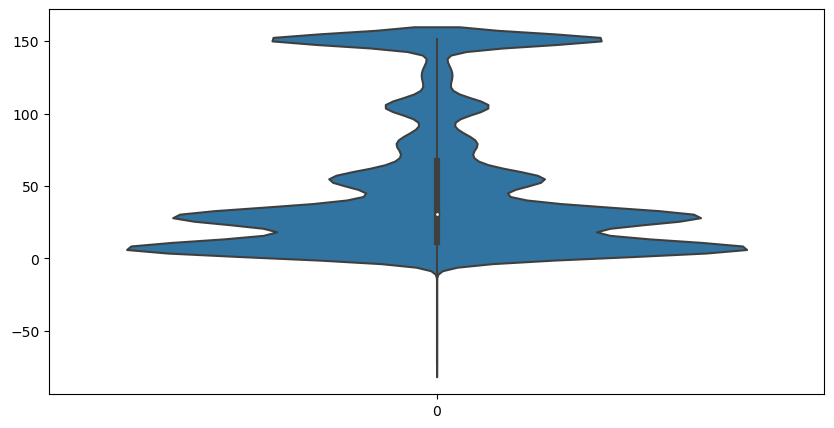

In [158]:
sn.violinplot(data['quantity tons'])
#sn.boxplot(data['quantity tons'])


<Axes: xlabel='quantity tons', ylabel='Density'>

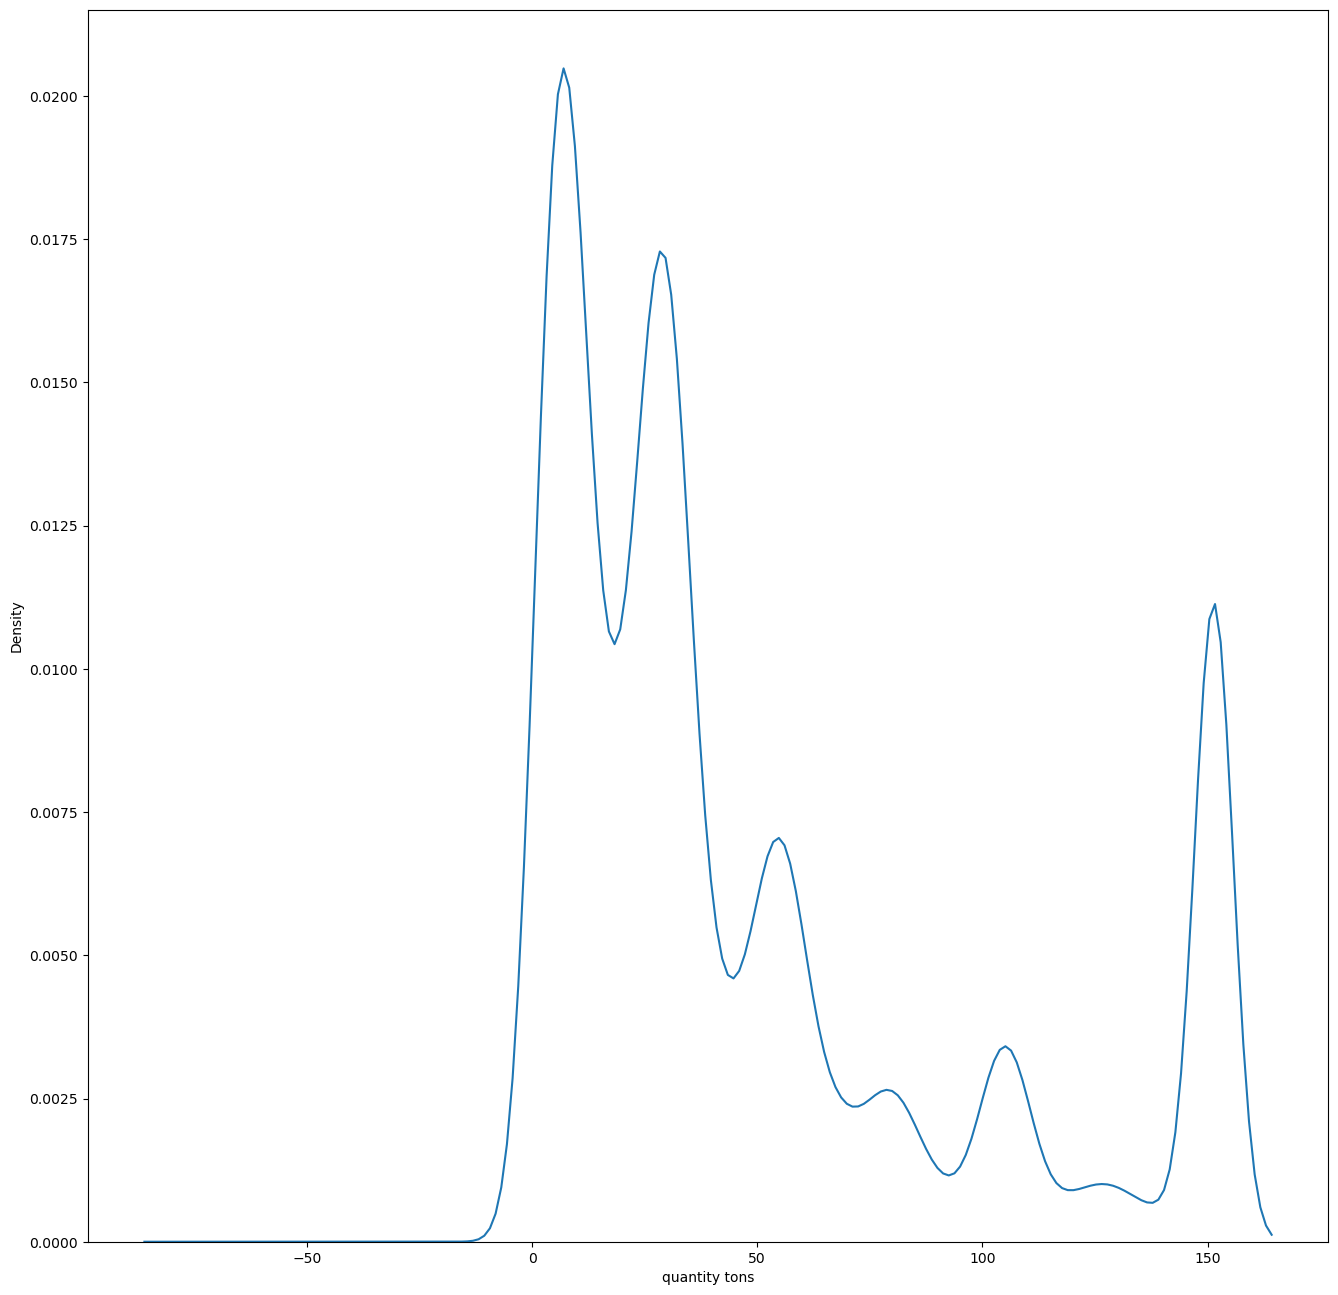

In [156]:
sn.kdeplot(data['quantity tons']) #highly skewed

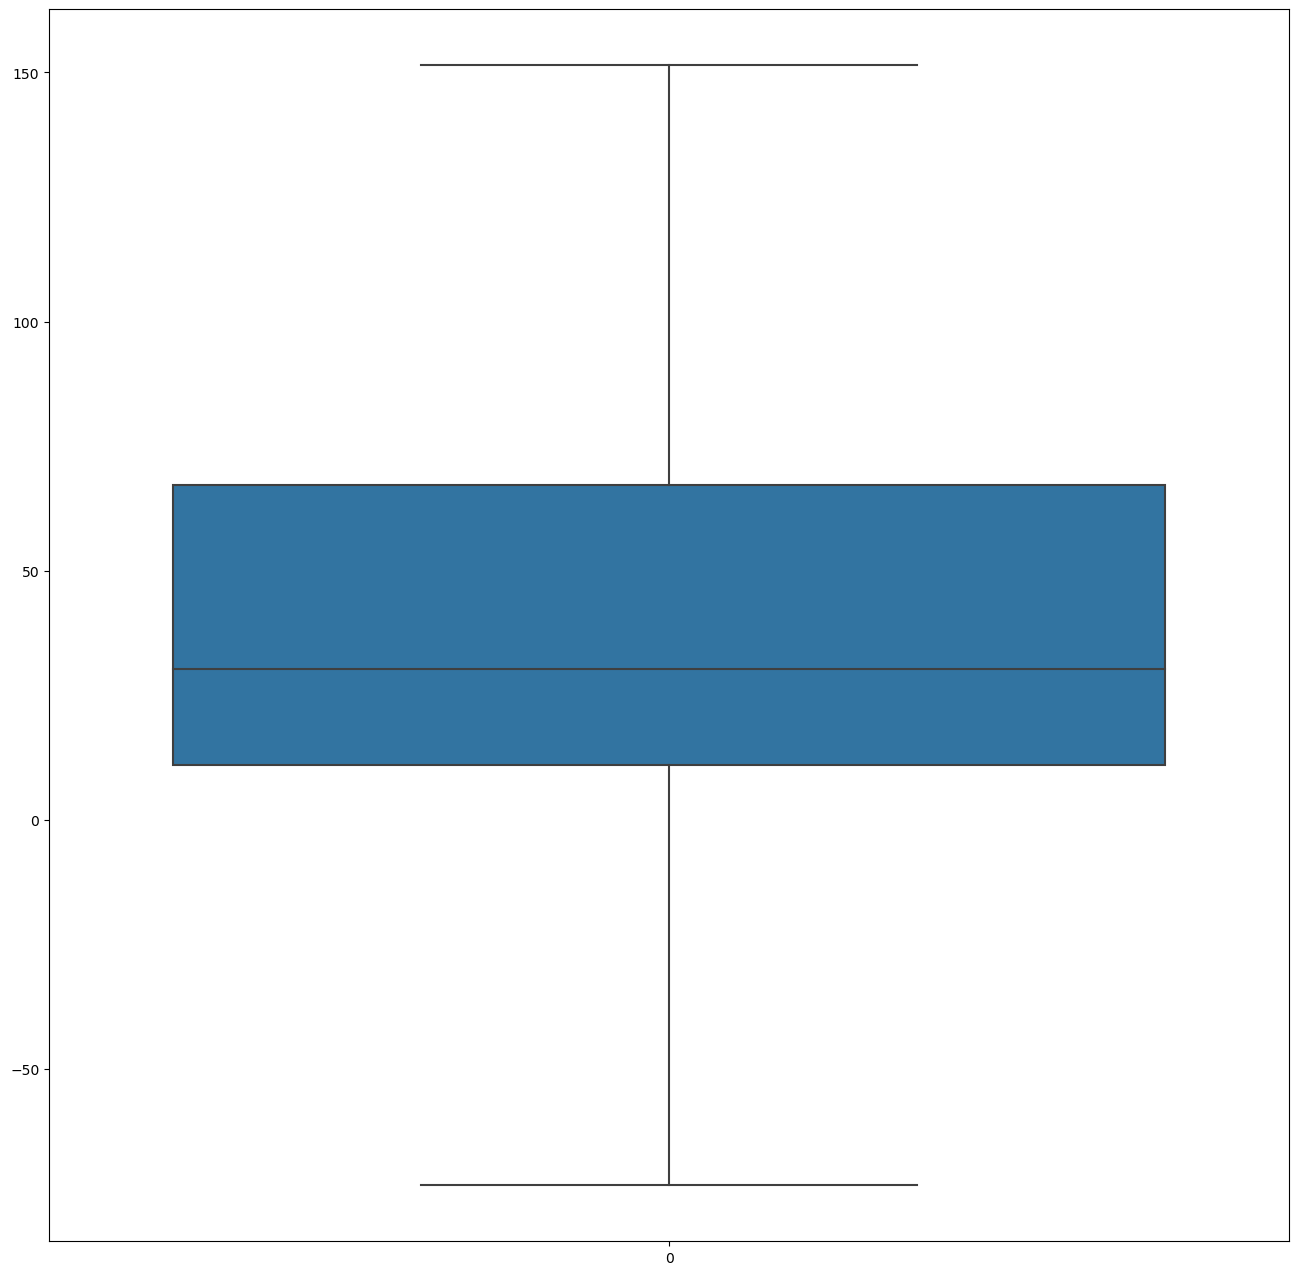

In [157]:
sn.boxplot(data['quantity tons'])
rcParams['figure.figsize'] =10,5

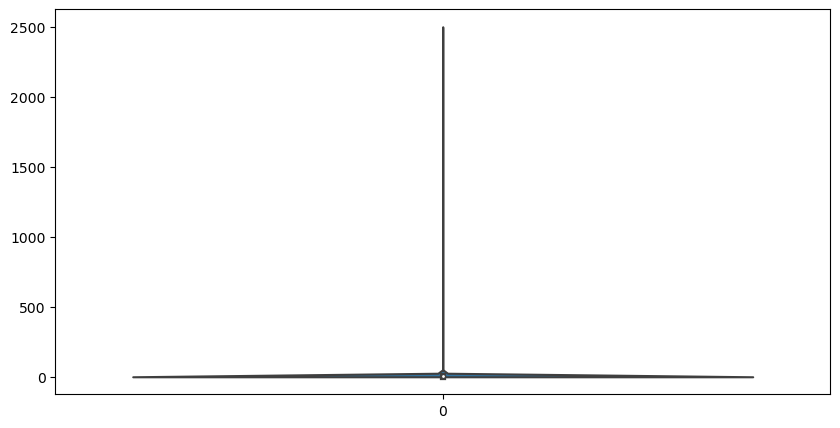

In [68]:
#thickness 
sn.violinplot(data.thickness)
rcParams['figure.figsize'] =10,5

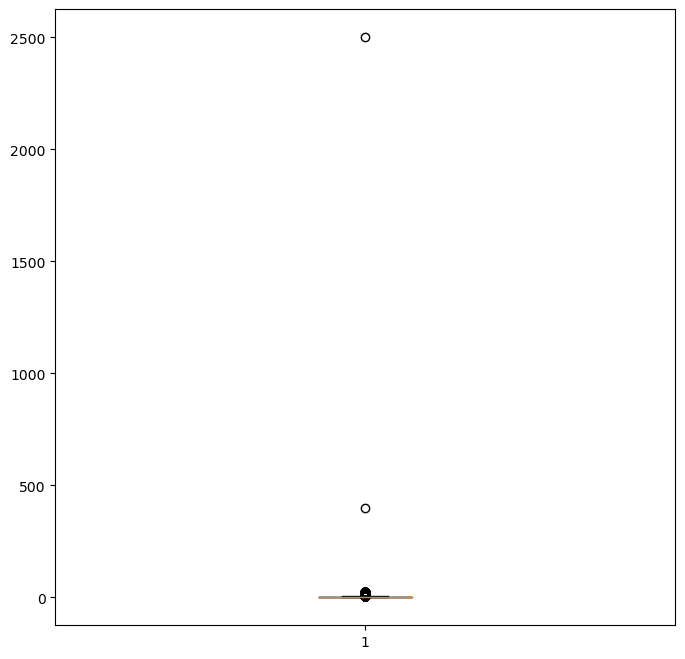

In [67]:
plt.boxplot(data.thickness)
plt.show()
rcParams['figure.figsize'] =10,5

<Axes: ylabel='Density'>

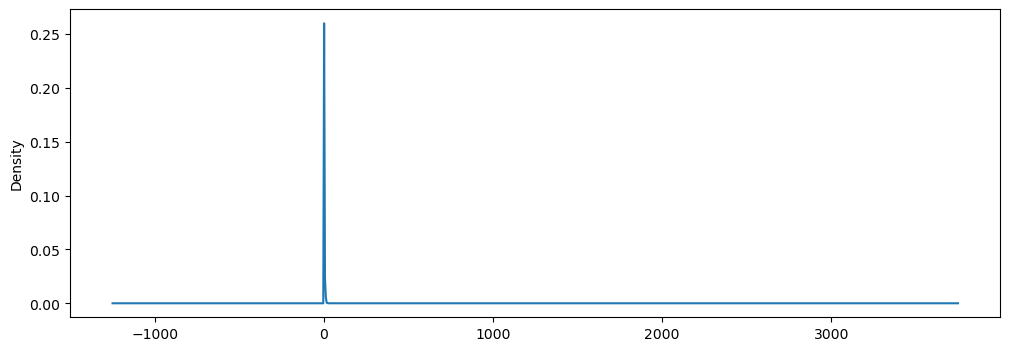

In [209]:
data.thickness.plot.kde() #high skewed data

<Axes: xlabel='width', ylabel='Density'>

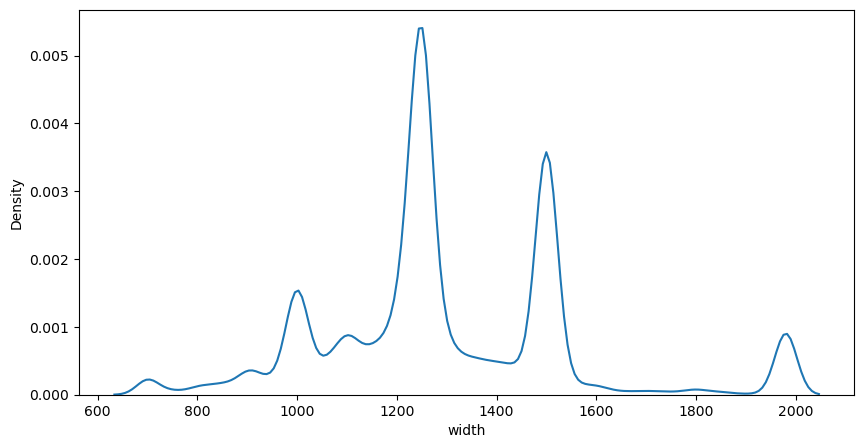

In [159]:
sn.kdeplot(data['width']) #highly skewed on both side

<Axes: >

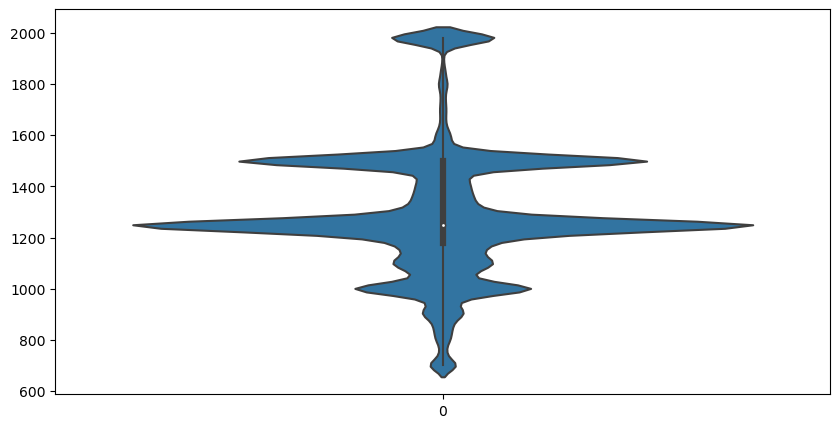

In [160]:
sn.violinplot(data['width'])

<Axes: >

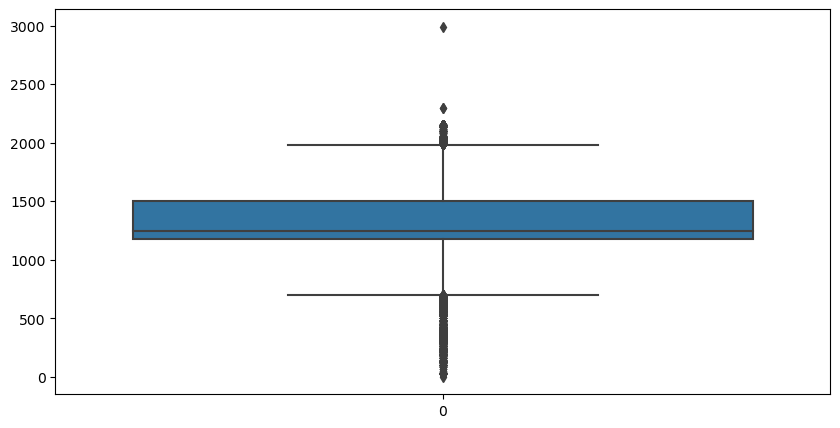

In [131]:
sn.boxplot(data['width']) #lot of outliers

6.449999999999999 -2.75


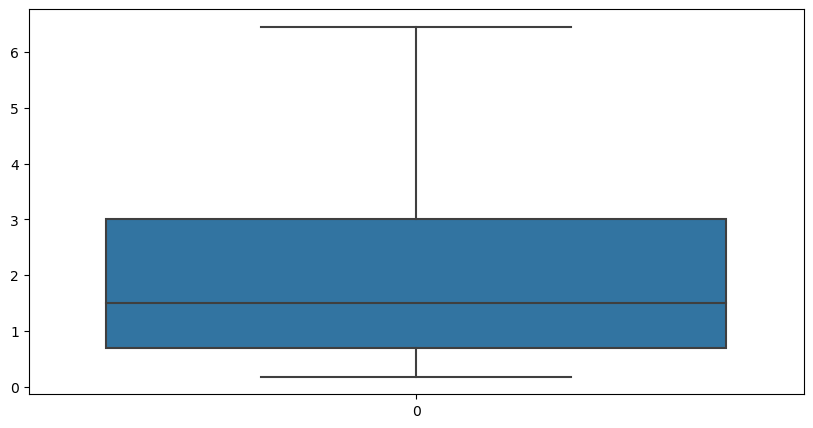

In [132]:
# 
iqr = data['thickness'].quantile(0.75) - data['thickness'].quantile(0.25)
up_threshold = data['thickness'].quantile(0.75) + (1.5*iqr)
low_threshold = data['thickness'].quantile(0.25) - (1.5*iqr)
data.thickness = data.thickness.clip(low_threshold,up_threshold)
sn.boxplot(data['thickness'])
print(up_threshold,low_threshold) #(700,700)

1980.0 700.0


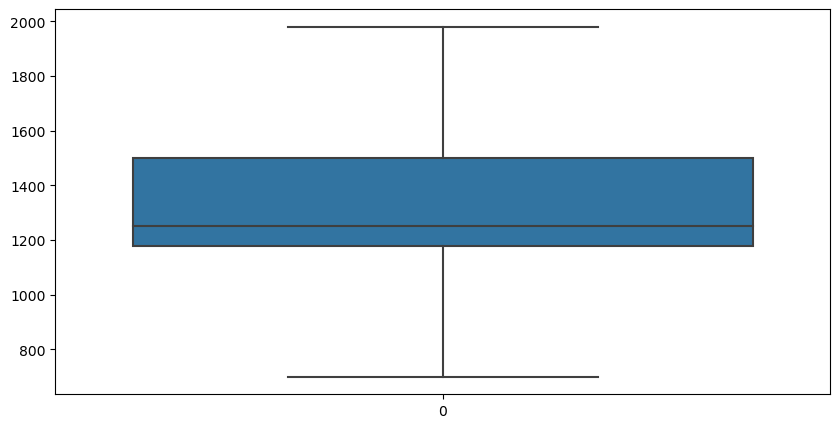

In [133]:
#width colum
iqr = data['width'].quantile(0.75) - data['width'].quantile(0.25)
up_threshold = data['width'].quantile(0.75) + (1.5*iqr)
low_threshold = data['width'].quantile(0.25) - (1.5*iqr)
data['width'] = data['width'].clip(low_threshold,up_threshold)
print(up_threshold,low_threshold)
sn.boxplot(data['width'])
rcParams['figure.figsize'] =10,5


<Axes: >

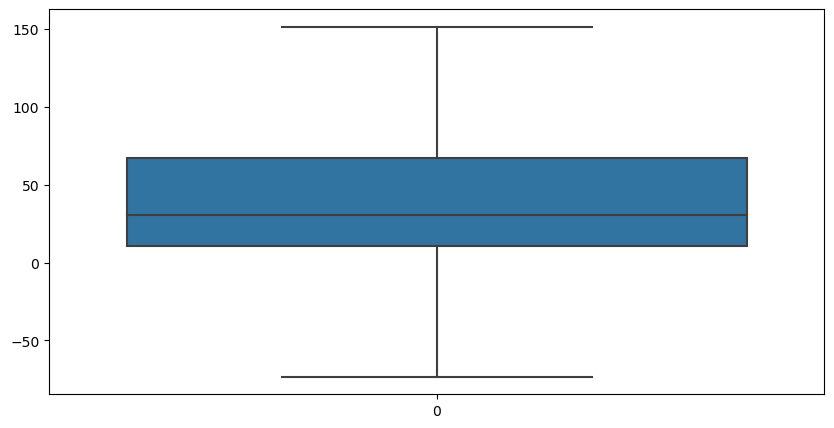

In [134]:

iqr = data['quantity tons'].quantile(0.75) - data['quantity tons'].quantile(0.25)
up_threshold = data['quantity tons'].quantile(0.75) + (1.5*iqr)
low_threshold = data['quantity tons'].quantile(0.25) - (1.5*iqr)
data['quantity tons'] = data['quantity tons'].clip(low_threshold,up_threshold)
sn.boxplot(data['quantity tons'])

In [141]:
data.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8872\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
item_date,1.000000,-0.008821,-0.015957,-0.015885,0.010183,0.017507,0.037444,0.111252,0.004467
customer,-0.008821,1.000000,0.015936,-0.010105,0.021805,0.009585,-0.007716,0.000955,-0.000053
country,-0.015957,0.015936,1.000000,-0.019511,-0.055492,0.054072,-0.147476,-0.015249,0.002991
application,-0.015885,-0.010105,-0.019511,1.000000,-0.163548,-0.198914,-0.131752,-0.013540,0.001462
thickness,0.010183,0.021805,-0.055492,-0.163548,1.000000,0.419054,0.155775,0.004967,-0.003294
width,0.017507,0.009585,0.054072,-0.198914,0.419054,1.000000,-0.024125,0.001406,0.000593
product_ref,0.037444,-0.007716,-0.147476,-0.131752,0.155775,-0.024125,1.000000,0.013398,0.002118
delivery date,0.111252,0.000955,-0.015249,-0.013540,0.004967,0.001406,0.013398,1.000000,0.000454
selling_price,0.004467,-0.000053,0.002991,0.001462,-0.003294,0.000593,0.002118,0.000454,1.000000


In [167]:
#no linear relation between target and numerical feature
#try log transformation on width, thickness
from sklearn.preprocessing import FunctionTransformer
trans = FunctionTransformer(func = np.log1p)
log_transform = trans.fit_transform(data[['width','thickness','quantity tons']])
log_transform




C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log1p
  result = func(self.values, **kwargs)
C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


,width,thickness,quantity tons
0,7.313887,1.098612,4.007333
1,7.099202,0.587787,5.023881
2,6.859615,0.322083,5.023881
3,7.183871,1.193922,5.023881
4,7.591357,1.609438,5.023881
...,...,...,...
181668,7.107425,0.672944,4.634729
181669,7.313887,0.667829,5.023881
181670,7.131699,0.536493,1.609438
181671,7.131699,0.615186,NaN


In [79]:
#status feature - here one hot encoding with multiple labels are used to encode categorical data
data['status'].value_counts()
onehot_encoded_data = pd.get_dummies(data, columns =['status','item type'])
onehot_encoded_data

#label encoding
#from sklearn import preprocessing.LabelEncoder
#le = LabelEncoder()


,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price,...,status_To be approved,status_Won,status_Wonderful,item type_IPL,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
0,20210401.0,54.151139,30156308,28,10,700.0,1500.0,1670798778,20210701.0,854.00,...,0,1,0,0,0,0,0,0,1,0
1,20210401.0,768.024839,30202938,25,41,700.0,1210.0,1668701718,20210401.0,1047.00,...,0,1,0,0,0,0,0,0,1,0
2,20210401.0,386.127949,30153963,30,28,700.0,952.0,628377,20210101.0,644.33,...,0,1,0,0,0,0,0,0,0,1
3,20210401.0,202.411065,30349574,32,59,700.0,1317.0,1668701718,20210101.0,768.00,...,0,1,0,0,0,0,1,0,0,0
4,20210401.0,785.526262,30211560,28,10,700.0,2000.0,640665,20210301.0,577.00,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854,25,41,700.0,1220.0,164141591,20200701.0,591.00,...,0,1,0,0,0,0,0,0,1,0
181669,20200702.0,208.086469,30200854,25,41,700.0,1500.0,164141591,20200701.0,589.00,...,0,1,0,0,0,0,0,0,1,0
181670,20200702.0,4.235594,30200854,25,41,700.0,1250.0,164141591,20200701.0,619.00,...,0,1,0,0,0,0,0,0,1,0
181671,20200702.0,-2000,30200854,25,41,700.0,1250.0,164141591,20200701.0,601.00,...,0,1,0,0,0,0,0,0,1,0


In [24]:
#item type feature - one hot encoding
data['item type'].value_counts()

W         105612
S          69230
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: item type, dtype: int64

In [463]:
#customer colum and country column are in float data type - covert to int
data['customer'] = data['customer'].astype('int')
data['country']  =data['country'].astype('int')
data['country'].value_counts()

0         28
1         25
2         30
3         32
4         28
          ..
181668    25
181669    25
181670    25
181671    25
181672    25
Name: country, Length: 181666, dtype: int32

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price'],
      dtype='object')

In [424]:
data.corr()['selling_price']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5344\2169306428.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['selling_price']


customer        -0.000053
country          0.002991
application      0.001462
thickness       -0.001130
width            0.000583
product_ref      0.002118
delivery date    0.000454
selling_price    1.000000
Name: selling_price, dtype: float64

### Model - regression